In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
%matplotlib inline

In [225]:
dfUse=pd.read_excel("dfUse.xlsx")

In [226]:
dfUse.columns

Index([                        'Index_Col',
                              'As of Date',
                        'BTM Borrower Rtg',
                              'BTM Rating',
                   'downgrade forward all',
                 'Downgrade forward notch',
                         'CDL Customer ID',
                          'Cust Regist Nm',
                                'Division',
                                'Exposure',
                 'EDF Implied BTMU Rating',
                               'EDF Notch',
                               'EDF Value',
          'Notch Diff EDF Implied vs BTMU',
                'Secondary Loan Avg Price',
                 'CDS Implied BTMU Rating',
                        'CDS Spread (5yr)',
          'Notch Diff CDS Implied vs BTMU',
              'Moodys Implied BTMU Rating',
                        'Moodys LT Rating',
       'Notch Diff Moodys Implied vs BTMU',
                 'S&P Implied BTMU Rating',
                           'S&P 

In [6]:
dfUseSub=dfUse.loc[:,'Index_Col':'CDS_Change']

In [7]:
Y=dfUseSub['downgrade forward all']

In [8]:
Y.value_counts()

0    8941
1     814
Name: downgrade forward all, dtype: int64

### Countplot

In [218]:
sns.set(style="darkgrid")

Text(0,0.5,'Count')

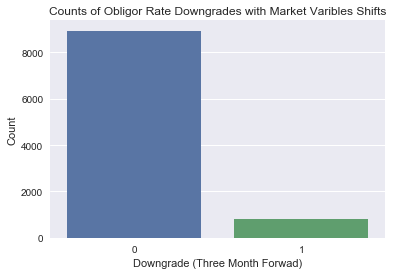

In [224]:
sns.countplot(x='downgrade forward all',data=dfUseSub)
plt.title('Counts of Obligor Rate Downgrades with Market Varibles Shifts')
plt.xlabel('Downgrade (Three Month Forwad)')
plt.ylabel('Count')

In [10]:
count_0 = len(dfUseSub[dfUseSub['downgrade forward all']==0])
count_1 = len([dfUseSub['downgrade forward all']==1])
pct_of_0 = count_0/(count_0+count_1)
print("percentage of no downgrade is", pct_of_0*100)
pct_of_1 = count_1/(count_0+count_1)
print("percentage of downgrade is", pct_of_1*100)

percentage of no downgrade is 99.98881681950347
percentage of downgrade is 0.011183180496533213


In [71]:
dfUseSub.groupby('downgrade forward all').mean().loc[:,'Exposure':'CDS_Change']

,Exposure,EDF Implied BTMU Rating,EDF Notch,EDF Value,Notch Diff EDF Implied vs BTMU,Secondary Loan Avg Price,CDS Implied BTMU Rating,CDS Spread (5yr),Notch Diff CDS Implied vs BTMU,Moodys Implied BTMU Rating,Moodys LT Rating,Notch Diff Moodys Implied vs BTMU,S&P Implied BTMU Rating,S&P LT Rating,Moody's Id,SP_Change,Moodys_Change,EDF_Change,CDS_Change
downgrade forward all,,,,,,,,,,,,,,,,,,,
0,8.760096e+07,3.613936,3.753874,0.456383,-1.018023,98.759793,2.975807,106.459005,-1.564676,3.081026,5.745555,-1.339669,2.974471,5.635432,3.972651e+08,1.092437,1.058824,1.318032,1.045769
1,8.847430e+07,4.120026,4.573298,1.533877,-0.735602,94.333153,4.084231,325.361215,-0.780769,3.840033,6.019518,-1.234219,3.612783,5.482283,3.860124e+08,1.106383,1.207547,1.338462,1.132653


### Balance the data first

In [72]:
dfUseSubsetno=dfUseSub[dfUseSub['downgrade forward all']==0].sample(814,random_state=1)

In [73]:
dfUseSubsetyes=dfUseSub[dfUseSub['downgrade forward all']==1]

In [74]:
dfUseSubset=pd.concat([dfUseSubsetno,dfUseSubsetyes],axis=0)

In [75]:
dfUseSubset

,Index_Col,As of Date,BTM Borrower Rtg,BTM Rating,downgrade forward all,Downgrade forward notch,CDL Customer ID,Cust Regist Nm,Division,Exposure,...,Moodys LT Rating,Notch Diff Moodys Implied vs BTMU,S&P Implied BTMU Rating,S&P LT Rating,Moody's Id,BIR,SP_Change,Moodys_Change,EDF_Change,CDS_Change
268,4557,2018-07-31,32,3.2,0,0.0,120212,"WILLIAMS-SONOMA, INC.",USCBD,9.500000e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4569,74363,2017-04-28,81,8.1,0,0.0,62298,"NATIONAL OILWELL VARCO, INC.",USCBD,3.080000e+08,...,7.75,-7.0,3.1,7.428571,NaN,NaN,NaN,NaN,1.0,NaN
3130,53478,2016-03-31,51,5.1,0,0.0,38895,"CENTURYLINK, INC.",USCBD,9.925000e+07,...,7.75,0.0,5.1,3.571429,159500.0,B1,NaN,1.0,2.0,NaN
6572,103253,2018-07-31,52,5.2,0,0.0,8112,TENNECO INC.,USCBD,3.873087e+07,...,7.75,0.0,5.1,3.571429,600021341.0,B1,NaN,NaN,1.0,NaN
4382,71443,2015-10-30,51,5.1,0,0.0,61281,HCA INC.,USCBD,9.400000e+07,...,3.70,2.0,5.1,3.571429,NaN,NaN,NaN,NaN,1.0,NaN
1501,26440,2017-06-30,4,4.0,0,0.0,144434,VERESEN INC.,Canada,3.855942e+07,...,NaN,NaN,3.2,7.428571,NaN,NaN,NaN,NaN,1.0,NaN
5899,94083,2018-02-28,31,3.1,0,0.0,68407,PIONEER NATURAL RESOURCES COMPANY,USCBD,8.500000e+07,...,7.75,0.0,3.2,7.428571,600037555.0,Baa2,NaN,NaN,1.0,NaN
7460,117629,2015-08-31,81,8.1,0,0.0,87300,"SUMMIT-AGRO ARGENTINA, S.A.",Latin,1.646209e+06,...,3.70,-8.0,2.3,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2653,45948,2017-01-31,21,2.1,0,0.0,31480,"CISCO SYSTEMS, INC.",USCBD,1.175000e+08,...,2.80,0.0,1.0,3.571429,600017852.0,Aa3,NaN,NaN,2.0,NaN
9233,146454,2017-12-29,4,4.0,0,0.0,95937,ENGIE BRASIL ENERGIA S.A.,Latin,2.373283e+07,...,3.25,-2.0,2.2,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [76]:
X=dfUseSubset.loc[:,'SP_Change':'CDS_Change']

In [77]:
Y=dfUseSubset ['downgrade forward all']

In [78]:
X.fillna(0,inplace=True)

In [79]:
X

,SP_Change,Moodys_Change,EDF_Change,CDS_Change
268,0.0,0.0,1.0,0.0
4569,0.0,0.0,1.0,0.0
3130,0.0,1.0,2.0,0.0
6572,0.0,0.0,1.0,0.0
4382,0.0,0.0,1.0,0.0
1501,0.0,0.0,1.0,0.0
5899,0.0,0.0,1.0,0.0
7460,0.0,0.0,1.0,0.0
2653,0.0,0.0,2.0,0.0
9233,0.0,0.0,0.0,1.0


In [80]:
Y

268     0
4569    0
3130    0
6572    0
4382    0
1501    0
5899    0
7460    0
2653    0
9233    0
1064    0
2493    0
6027    0
8591    0
4154    0
3208    0
8108    0
257     0
3204    0
5335    0
2908    0
5012    0
7069    0
7113    0
8257    0
3432    0
9622    0
9204    0
8956    0
336     0
       ..
9412    1
9413    1
9414    1
9434    1
9452    1
9453    1
9455    1
9464    1
9465    1
9466    1
9484    1
9498    1
9499    1
9500    1
9506    1
9511    1
9516    1
9523    1
9566    1
9588    1
9631    1
9632    1
9641    1
9648    1
9661    1
9662    1
9674    1
9685    1
9719    1
9749    1
Name: downgrade forward all, Length: 1628, dtype: int64

### Modeling Naive Bayes

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [83]:
from sklearn.naive_bayes import GaussianNB

In [84]:
gnb = GaussianNB()

In [85]:
Y_pred = gnb.fit(X_train,y_train).predict(X_test)

In [86]:
Y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [189]:
gnb.predict_proba(X_test)

array([[9.06397212e-01, 9.36027878e-02],
       [9.06397212e-01, 9.36027878e-02],
       [4.55628182e-07, 9.99999544e-01],
       [8.16869252e-01, 1.83130748e-01],
       [9.06397212e-01, 9.36027878e-02],
       [8.16869252e-01, 1.83130748e-01],
       [9.06397212e-01, 9.36027878e-02],
       [3.17994128e-10, 1.00000000e+00],
       [9.06397212e-01, 9.36027878e-02],
       [8.16869252e-01, 1.83130748e-01],
       [9.32737843e-01, 6.72621570e-02],
       [9.06397212e-01, 9.36027878e-02],
       [9.06397212e-01, 9.36027878e-02],
       [9.06397212e-01, 9.36027878e-02],
       [8.16869252e-01, 1.83130748e-01],
       [9.32737843e-01, 6.72621570e-02],
       [9.06397212e-01, 9.36027878e-02],
       [9.59822267e-01, 4.01777327e-02],
       [9.06397212e-01, 9.36027878e-02],
       [8.16869252e-01, 1.83130748e-01],
       [1.68051366e-65, 1.00000000e+00],
       [9.06397212e-01, 9.36027878e-02],
       [8.16869252e-01, 1.83130748e-01],
       [9.06397212e-01, 9.36027878e-02],
       [4.556281

In [87]:
print("Number of mislabeled points out of a total %d points : %d" % (len(Y_pred),(y_test != Y_pred).sum()))

Number of mislabeled points out of a total 326 points : 139


In [88]:
from sklearn.metrics import recall_score, accuracy_score, precision_score

In [89]:
accuracy_score(y_test, Y_pred)   ##the proportion of correct results that a classifier achieved    slightly better than random guessing

0.5736196319018405

In [90]:
recall_score(y_test, Y_pred)  ##miss much

0.16455696202531644

In [91]:
precision_score(y_test, Y_pred)  ##the one predicted are relatively accurate

0.7878787878787878

#### resetting the threshold

In [246]:
THRESHOLD = 0.40

In [247]:
preds_thre = np.where(logistic.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

In [248]:
predsnb_thre=np.where(gnb.predict_proba(X_test)[:,1]>=THRESHOLD, 1, 0)

In [249]:
pd.DataFrame(data=[accuracy_score(y_test, predsnb_thre), recall_score(y_test, predsnb_thre),precision_score(y_test, predsnb_thre), roc_auc_score(y_test, predsnb_thre)], index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.573620
recall,0.164557
precision,0.787879
roc_auc_score,0.561445


#### logistic regression

In [92]:
from sklearn import linear_model
logistic = linear_model.LogisticRegression()

In [93]:
y_pred_log = logistic.fit(X_train, y_train).predict(X_test)
print (y_pred_log)

[0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0
 0 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0
 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0
 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0]


In [96]:
logistic.coef_

array([[ 1.70169113,  1.32014698, -0.04841927,  0.26896275]])

In [97]:
logistic.intercept_

array([-0.20230078])

In [94]:
print("Number of mislabeled points from logistic regression out of a total %d points : %d" % (len(y_pred_log),(y_test != y_pred_log).sum()))

Number of mislabeled points from logistic regression out of a total 326 points : 144


In [104]:
y_test

15      1
4874    1
7713    1
5280    1
5379    0
3501    1
989     0
846     1
8855    1
3511    0
9396    1
7178    0
926     0
9199    1
8571    1
6566    1
2648    0
7837    0
1660    0
2759    0
9145    0
6381    1
5356    1
642     0
4195    1
8722    0
6385    0
1730    0
6543    1
2197    0
       ..
6031    1
2002    0
3115    0
3661    0
7305    1
7135    1
2978    0
838     0
9097    1
1822    0
443     0
4600    0
4676    1
2473    0
7540    1
5952    1
6429    0
3692    0
8705    0
7517    0
2644    0
335     1
2580    1
7974    1
766     1
5003    0
2618    1
697     1
828     1
3891    1
Name: downgrade forward all, Length: 326, dtype: int64

In [131]:
Y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [114]:
print  ("   Case 0            Case 1")
(list(logistic.predict_proba(X_test)))  ## change the threshold of the model????   threshold is 0.48???
                                        ## case 1 reaches 0.4, then predict as case 1

   Case 0            Case 1


[array([0.56235372, 0.43764628]),
 array([0.56235372, 0.43764628]),
 array([0.24641101, 0.75358899]),
 array([0.48334068, 0.51665932]),
 array([0.56235372, 0.43764628]),
 array([0.48334068, 0.51665932]),
 array([0.56235372, 0.43764628]),
 array([0.18251647, 0.81748353]),
 array([0.56235372, 0.43764628]),
 array([0.48334068, 0.51665932]),
 array([0.5742321, 0.4257679]),
 array([0.56235372, 0.43764628]),
 array([0.56235372, 0.43764628]),
 array([0.56235372, 0.43764628]),
 array([0.48334068, 0.51665932]),
 array([0.5742321, 0.4257679]),
 array([0.56235372, 0.43764628]),
 array([0.58602542, 0.41397458]),
 array([0.56235372, 0.43764628]),
 array([0.48334068, 0.51665932]),
 array([0.02279534, 0.97720466]),
 array([0.56235372, 0.43764628]),
 array([0.48334068, 0.51665932]),
 array([0.56235372, 0.43764628]),
 array([0.24641101, 0.75358899]),
 array([0.5742321, 0.4257679]),
 array([0.24641101, 0.75358899]),
 array([0.48334068, 0.51665932]),
 array([0.56235372, 0.43764628]),
 array([0.48334068, 

In [119]:
import matplotlib.pyplot as plt

In [55]:
accuracy_score(y_test, y_pred_log)

0.558282208588957

In [56]:
recall_score(y_test, y_pred_log)

0.3670886075949367

In [57]:
precision_score(y_test, y_pred_log)

0.5686274509803921

#### p-value calculation

In [230]:
import statsmodels.api as sm
from scipy import stats

In [235]:
est = sm.Logit(y_train, X_train)

In [236]:
est2=est.fit()

Optimization terminated successfully.
         Current function value: 0.649644
         Iterations 6


In [237]:
print(est2.summary())

                             Logit Regression Results                            
Dep. Variable:     downgrade forward all   No. Observations:                 1302
Model:                             Logit   Df Residuals:                     1298
Method:                              MLE   Df Model:                            3
Date:                   Wed, 03 Oct 2018   Pseudo R-squ.:                 0.06272
Time:                           14:12:55   Log-Likelihood:                -845.84
converged:                          True   LL-Null:                       -902.44
                                           LLR p-value:                 2.241e-24
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
SP_Change         1.7337      0.336      5.161      0.000       1.075       2.392
Moodys_Change     1.2791      0.255      5.018      0.000       0.780       1.779
EDF_Change      

In [ ]:
 def fit(self, X, y, n_jobs=1):
        self = super(LogisticRegression, self).fit(X_train, y_train, n_jobs)

        sse = np.sum((self.predict(X_test) - y_test) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([
            np.sqrt(np.diagonal(sse[i] * np.linalg.inv(np.dot(X.T, X))))
                                                    for i in range(sse.shape[0])
                    ])

        self.t = self.coef_ / se
        self.p = 2 * (1 - stats.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1]))
        return self

#### Change the threshold of the logistic regression

In [168]:
THRESHOLD = 0.45  ###optimal threshold in this case 

In [181]:
logistic.predict_proba(X_test)[:,1]

array([0.43764628, 0.43764628, 0.75358899, 0.51665932, 0.43764628,
       0.51665932, 0.43764628, 0.81748353, 0.43764628, 0.51665932,
       0.4257679 , 0.43764628, 0.43764628, 0.43764628, 0.51665932,
       0.4257679 , 0.43764628, 0.41397458, 0.43764628, 0.51665932,
       0.97720466, 0.43764628, 0.51665932, 0.43764628, 0.75358899,
       0.4257679 , 0.75358899, 0.51665932, 0.43764628, 0.51665932,
       0.71589083, 0.51665932, 0.4257679 , 0.51665932, 0.43764628,
       0.43764628, 0.43764628, 0.43764628, 0.43764628, 0.51665932,
       0.51665932, 0.43764628, 0.43764628, 0.58312732, 0.43764628,
       0.43764628, 0.51665932, 0.9437225 , 0.51665932, 0.43764628,
       0.43764628, 0.91967897, 0.51665932, 0.43764628, 0.43764628,
       0.43764628, 0.50456055, 0.43764628, 0.43764628, 0.43764628,
       0.43764628, 0.4257679 , 0.40227908, 0.43764628, 0.81748353,
       0.51665932, 0.91967897, 0.43764628, 0.51665932, 0.43764628,
       0.43764628, 0.41397458, 0.4257679 , 0.51665932, 0.43764

In [169]:
preds_thre = np.where(logistic.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

In [170]:
preds_thre

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [171]:
 from sklearn.metrics import roc_auc_score

In [172]:
pd.DataFrame(data=[accuracy_score(y_test, preds_thre), recall_score(y_test, preds_thre),precision_score(y_test, preds_thre), roc_auc_score(y_test, preds_thre)], index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.561350
recall,0.373418
precision,0.572816
roc_auc_score,0.555756


#### linear regression

In [58]:
reg=linear_model.LinearRegression()

In [59]:
Y2=dfUseSubset['Downgrade forward notch']

In [61]:
Y2

268     0.0
4569    0.0
3130    0.0
6572    0.0
4382    0.0
1501    0.0
5899    0.0
7460    0.0
2653    0.0
9233    0.0
1064    0.0
2493    0.0
6027    0.0
8591    0.0
4154    0.0
3208    0.0
8108    0.0
257     0.0
3204    0.0
5335    0.0
2908    0.0
5012    0.0
7069    0.0
7113    0.0
8257    0.0
3432    0.0
9622    0.0
9204    0.0
8956    0.0
336     0.0
       ... 
9412    1.0
9413    0.9
9414    0.9
9434    0.1
9452    1.1
9453    1.1
9455    0.1
9464    0.1
9465    0.2
9466    1.8
9484    1.0
9498    1.0
9499    1.9
9500    1.9
9506    1.0
9511    1.0
9516    1.0
9523    0.1
9566    1.8
9588    1.0
9631    0.8
9632    0.8
9641    1.0
9648    0.9
9661    1.2
9662    1.2
9674    0.1
9685    0.1
9719    0.2
9749    1.2
Name: Downgrade forward notch, Length: 1628, dtype: float64

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, Y2, test_size=0.2, random_state=42)

In [62]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
reg.score(X_train, y_train)

0.09848908777734444

In [64]:
reg.coef_

array([ 0.2451302 ,  0.64190858, -0.00082618,  0.07450273])

In [65]:
Y_predict=reg.predict(X_test)

In [66]:
Y_predict

array([0.43270668, 0.43270668, 1.07544144, 0.5080356 , 0.43270668,
       0.5080356 , 0.43270668, 0.67866306, 0.43270668, 0.5080356 ,
       0.4318805 , 0.43270668, 0.43270668, 0.43270668, 0.5080356 ,
       0.4318805 , 0.43270668, 0.43105432, 0.43270668, 0.5080356 ,
       2.35925861, 0.43270668, 0.5080356 , 0.43270668, 1.07544144,
       0.4318805 , 1.07544144, 0.5080356 , 0.43270668, 0.5080356 ,
       1.07213672, 0.5080356 , 0.4318805 , 0.5080356 , 0.43270668,
       0.43270668, 0.43270668, 0.43270668, 0.43270668, 0.5080356 ,
       0.5080356 , 0.43270668, 0.43270668, 0.58253833, 0.43270668,
       0.43270668, 0.5080356 , 1.32057164, 0.5080356 , 0.43270668,
       0.43270668, 1.71735002, 0.5080356 , 0.43270668, 0.43270668,
       0.43270668, 0.50720942, 0.43270668, 0.43270668, 0.43270668,
       0.43270668, 0.4318805 , 0.43022814, 0.43270668, 0.67866306,
       0.5080356 , 1.71735002, 0.43270668, 0.5080356 , 0.43270668,
       0.43270668, 0.43105432, 0.4318805 , 0.5080356 , 0.43270

In [67]:
np.mean((Y_predict-y_test)**2)

0.5862014691570056

In [ ]:
probas = logistic.predict_proba(X_test)
for k in range(2):
    plt.subplot(1, 2, 0 * n_classes + k + 1)
    plt.title("Class %d" % k)
    if k == 0:
        plt.ylabel('Logistic')
    imshow_handle = plt.imshow(probas[:, k].reshape((1000, 1000)),extent=(3, 9, 1, 5), origin='lower')
    plt.xticks(())
    plt.yticks(())
    idx = (y_pred == k)
    if idx.any():
        plt.scatter(X[idx, 0], X[idx, 1], marker='o', c='w', edgecolor='k')

ax = plt.axes([0.15, 0.04, 0.7, 0.05])
plt.title("Probability")
plt.colorbar(imshow_handle, cax=ax, orientation='horizontal')

plt.show()